# What are tensors ?
A tensor is a generalization of the scalar,vectors,matrices..etc. We can say scalars as 0 dimensional tensor,vectors as 1 dimensiona tensor and matrices as 2 dimensional tensor... and similarly n-dimensional tensor.

In [0]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = torch.ones(3,2)
print(x)
x= torch.zeros(3,2)
print(x)
x=torch.rand(3,2)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[0.5281, 0.0281],
        [0.3828, 0.0176],
        [0.4347, 0.0369]])


In [3]:
x=torch.empty(3,2)#create tensor with initialization so will be filled with garbage values
print(x)
x=torch.zeros_like(x) # this will create tensor of the same shape of x but with zeros
print(x)


tensor([[4.3722e-36, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [4]:
x= torch.linspace(0,1,steps=5)#create a linear spaced tensor from 0->1 
print(x)

tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


In [5]:
x=torch.tensor([[1,2],[3,4],[5,6]])#create a custom tensor
print(x)

tensor([[1, 2],
        [3, 4],
        [5, 6]])


# Slicing a tensor

In [6]:
print(x.size())
print(x[:,1])#all row and 1st column
print([x[0,:]])# 0th row and all column

torch.Size([3, 2])
tensor([2, 4, 6])
[tensor([1, 2])]


In [7]:
#Accessing a particular element in the tensor
y = x[1,1]
print(y)
print(y.item())

tensor(4)
4


# Reshaping tensors

In [8]:
print(x)
y = x.view(2,3) #for reshaping
print(y)

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [9]:
y = x.view(6,-1)
print(y)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])


#Tensor operations

In [10]:
x= torch.ones([3,2])
y= torch.ones([3,2])
z = x+y
print(z)
z = x-y
print(z)
z = x*y
print(z)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [11]:
z= y.add(x)
print(z)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])


In [12]:
z = y.add_(x)
print(z)
print(y)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])
tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])


# Numpy with Pytorch

In [13]:
x_np= x.numpy() #torch -> numpy
print(type(x_np),type(x))
print(x_np)

<class 'numpy.ndarray'> <class 'torch.Tensor'>
[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [14]:
a= np.random.randn(5)
print(a)
a_pt= torch.from_numpy(a) #numpy -> torch
print(type(a_pt),type(a))
print(a_pt)

[ 0.2606176  -0.44047997  0.20685233 -0.38889543  2.52322051]
<class 'torch.Tensor'> <class 'numpy.ndarray'>
tensor([ 0.2606, -0.4405,  0.2069, -0.3889,  2.5232], dtype=torch.float64)


In [15]:
np.add(a,1, out=a)
print(a)
print(a_pt)

[1.2606176  0.55952003 1.20685233 0.61110457 3.52322051]
tensor([1.2606, 0.5595, 1.2069, 0.6111, 3.5232], dtype=torch.float64)


In [16]:
%%time
for i in range(50):
    a= np.random.randn(100,100) # random no from normal distribution
    b= np.random.randn(100,100) # random no from normal distribution
    c= a+b


CPU times: user 44.9 ms, sys: 679 µs, total: 45.6 ms
Wall time: 47.8 ms


In [17]:
%%time
for i in range(50):
    a= torch.randn(100,100) # random no from normal distribution
    b= torch.randn(100,100) # random no from normal distribution
    c= a+b

CPU times: user 12.6 ms, sys: 919 µs, total: 13.5 ms
Wall time: 14.9 ms


In [18]:
%%time
for i in range(50):
    a= np.random.randn(100,100) # random no from normal distribution
    b= np.random.randn(100,100) # random no from normal distribution
    c= np.matmul(a,b)

CPU times: user 71.3 ms, sys: 53 ms, total: 124 ms
Wall time: 72.5 ms


In [19]:
%%time
for i in range(50):
    a= torch.randn(100,100) # random no from normal distribution
    b= torch.randn(100,100) # random no from normal distribution
    c= torch.matmul(a,b)

CPU times: user 12.9 ms, sys: 1.29 ms, total: 14.2 ms
Wall time: 72.3 ms


# CUDA Support

In [20]:
print(torch.cuda.device_count())

1


In [21]:
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

Tesla K80


In [0]:
cuda0= torch.device('cuda:0')

In [23]:
a= torch.ones(3,2, device=cuda0)#creating tensor on gpu
b= torch.ones(3,2, device=cuda0)
c= a+b
print(c)

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]], device='cuda:0')


In [24]:
#cpu with numpy
%%time

for i in range(10):
    a = np.random.randn(10000,10000)
    b = np.random.randn(10000,10000)
    np.add(a,b)

CPU times: user 1min 25s, sys: 562 ms, total: 1min 25s
Wall time: 1min 25s


In [25]:
#cpu with pytorch
%%time

for i in range(10):
    a = torch.randn([10000,10000])
    b = torch.randn([10000,10000])
    b.add_(a)


CPU times: user 17.3 s, sys: 9.79 ms, total: 17.3 s
Wall time: 17.3 s


In [26]:
#gpu with pytorch
%%time

for i in range(10):
    a = torch.randn([10000,10000],device=cuda0)
    b = torch.randn([10000,10000],device=cuda0)
    b.add_(a)

CPU times: user 1.11 ms, sys: 4 ms, total: 5.12 ms
Wall time: 15.1 ms


# Autograd

In [27]:
x= torch.ones([3,2], requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)


In [28]:
y= x+5
print(y)

tensor([[6., 6.],
        [6., 6.],
        [6., 6.]], grad_fn=<AddBackward0>)


In [29]:
z= y*y + 1
print(z)

tensor([[37., 37.],
        [37., 37.],
        [37., 37.]], grad_fn=<AddBackward0>)


In [30]:
t= torch.sum(z)
print(t)

tensor(222., grad_fn=<SumBackward0>)


In [0]:
t.backward()

In [32]:
print(x.grad)#derivative of t wrt to x

tensor([[12., 12.],
        [12., 12.],
        [12., 12.]])


$t=\sum_i z_i,\;z_i=y_i^2+1,\;y_i=x_i+5$

$\frac{\partial t}{\partial x_t} = \frac{\partial z_i}{\partial x_i} = \frac{\partial z_i}{\partial y_i}\frac{\partial y_i}{\partial x_i} = 2y_i*1 $

At x=1 , y=6, $\frac{\partial t}{\partial x_i} = 12$

# Autograd using sigmoid

In [33]:
x = torch.ones([3,2],requires_grad=True)
y = x+5
r= 1/(1+torch.exp(-y)) #sigmoid function
print(r)
s = torch.sum(r)
s.backward()
print(x.grad) #derivative of s wrt to x which is derivative of sigmoid = f(x)*(1-f(x))

tensor([[0.9975, 0.9975],
        [0.9975, 0.9975],
        [0.9975, 0.9975]], grad_fn=<MulBackward0>)
tensor([[0.0025, 0.0025],
        [0.0025, 0.0025],
        [0.0025, 0.0025]])


In [34]:
x = torch.ones([3,2],requires_grad=True)
y = x+5
r= 1/(1+torch.exp(-y)) #sigmoid function
a= torch.ones([3,2])
r.backward(a)
print(x.grad)

tensor([[0.0025, 0.0025],
        [0.0025, 0.0025],
        [0.0025, 0.0025]])


$[\frac{\partial s}{\partial x}=\frac{\partial s}{\partial r} . \frac{\partial r}{\partial x}]$
From the above code a represents $\frac{\partial s}{\partial r}$ and then x.grad gives directly $\frac{\partial s}{\partial x}$

# Autograd example with learning loops

In [0]:
#creating random dummy dataset
x= torch.randn([20,1],requires_grad=True)
y= 3*x - 2

In [0]:
#weights and bias as parameters and wx+b as the model with loss as defined below
w= torch.tensor([1.],requires_grad=True)
b= torch.tensor([1.],requires_grad=True)

y_hat = w*x+b # estimated model
loss= torch.sum((y_hat-y)**2)

In [37]:
print(loss)

tensor(291.4031, grad_fn=<SumBackward0>)


In [0]:
loss.backward()

In [39]:
print(w.grad,b.grad)

tensor([-94.8028]) tensor([131.0669])


# Performing autograd inside a loop

In [40]:
learning_rate = 0.01
w= torch.tensor([1.],requires_grad=True)
b= torch.tensor([1.],requires_grad=True)

print(w.item(),b.item())

for i in range(10):
    x=torch.randn([20,1])
    y= 3*x - 2

    y_hat = w*x+b # estimated model
    loss= torch.sum((y_hat-y)**2)
    loss.backward()

    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad

        w.grad.zero_()
        b.grad.zero_()
    print(w.item(),b.item())

1.0 1.0
2.3135247230529785 -0.22080779075622559
2.849655866622925 -1.007552146911621
2.7087955474853516 -1.3735573291778564
2.8445963859558105 -1.6255817413330078
2.821967363357544 -1.7474600076675415
2.882298469543457 -1.848128318786621
2.9052653312683105 -1.8934259414672852
2.9499454498291016 -1.9344478845596313
2.963045835494995 -1.96315336227417
2.9831035137176514 -1.9790846109390259


# For larger problem

In [41]:
%%time
learning_rate = 0.001
N=1000
epochs=2000
w= torch.rand([N],requires_grad=True)
b= torch.ones([1],requires_grad=True)

print(torch.mean(w).item(),b.item())

for i in range(epochs):
    x=torch.randn([N])
    y= torch.dot(3*torch.ones([N]),x) - 2

    y_hat = torch.dot(w,x) + b
    loss= torch.sum((y_hat-y)**2)
    loss.backward()

    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad

        w.grad.zero_()
        b.grad.zero_()
    print(torch.mean(w).item(),b.item())

0.511910080909729 1.0
0.5231548547744751 1.2417033910751343
0.5236998200416565 1.2930909395217896
0.5247001051902771 1.3584929704666138
0.5277367830276489 1.2105673551559448
0.5434907078742981 0.9375138282775879
0.5458221435546875 0.8171178102493286
0.5458690524101257 0.8130651712417603
0.5630000233650208 1.1122899055480957
0.5681791305541992 1.2560933828353882
0.5690754652023315 1.3292033672332764
0.5714206695556641 1.2269161939620972
0.5718750357627869 1.1416268348693848
0.5718556642532349 1.1382158994674683
0.5803580284118652 0.9510093331336975
0.5807530879974365 1.0088584423065186
0.5820558667182922 1.0901838541030884
0.5845234394073486 1.1664838790893555
0.5854586362838745 1.2267521619796753
0.6155986785888672 0.843576192855835
0.6196998953819275 1.0203858613967896
0.6362866759300232 1.2767455577850342
0.6501476764678955 1.5657947063446045
0.650945782661438 1.5130165815353394
0.6779457926750183 1.8904162645339966
0.6778282523155212 1.928268313407898
0.6778101921081543 1.9570167064

In [42]:
%%time
learning_rate = 0.001
N=1000
epochs=2000
w= torch.rand([N],requires_grad=True,device=cuda0)
b= torch.ones([1],requires_grad=True,device=cuda0)

print(torch.mean(w).item(),b.item())

for i in range(epochs):
    x=torch.randn([N],device=cuda0)
    y= torch.dot(3*torch.ones([N],device=cuda0),x) - 2

    y_hat = torch.dot(w,x) + b
    loss= torch.sum((y_hat-y)**2)
    loss.backward()

    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad

        w.grad.zero_()
        b.grad.zero_()
    print(torch.mean(w).item(),b.item())

0.4944639205932617 1.0
0.5003247261047363 1.159170389175415
0.5033881068229675 1.2715108394622803
0.5115798711776733 1.061509370803833
0.5168374180793762 1.204514503479004
0.5336048603057861 1.4930267333984375
0.5335354804992676 1.4629205465316772
0.5396290421485901 1.2661925554275513
0.5397017002105713 1.2538954019546509
0.5397647023200989 1.2806748151779175
0.5405118465423584 1.221681833267212
0.5562838315963745 0.9378214478492737
0.5560240745544434 0.9593594670295715
0.556032121181488 0.9604820609092712
0.5559319853782654 1.0307689905166626
0.5556055903434753 0.9644457101821899
0.5699909925460815 0.7190917730331421
0.5707194805145264 0.7784333825111389
0.5708890557289124 0.8081546425819397
0.5718773603439331 0.8655129075050354
0.5792995691299438 1.0801290273666382
0.5847178101539612 0.904991626739502
0.596936047077179 0.6115164756774902
0.5970229506492615 0.6274130344390869
0.597557783126831 0.651496410369873
0.5977761745452881 0.6206492781639099
0.5981899499893188 0.560045659542083

-------
#Feed Forward networks in Pytorch

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm import tqdm_notebook 
import seaborn as sns
import time
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

import torch

In [110]:
torch.manual_seed(0)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

## Generate dataset

In [112]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


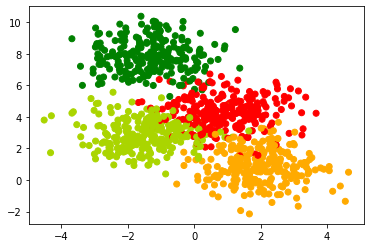

In [113]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [114]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)

(750, 2) (250, 2) (1000,)


## Converting the code to torch tensors

In [0]:
X_train, X_val, Y_train, Y_val = map(torch.tensor,(X_train, X_val, Y_train, Y_val))

In [116]:
print(X_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


In [117]:
#for understanding purpose only
a = torch.randn([2,4]) #make a grid of 2 rows and 4 columns
print(a)
a = a.exp()
print(a)
b = a.sum(0)
print('across 0 dimension: ',b)
c = a.sum(1)
print('across 1 dimension: ',c)
d = a.sum(-1) #-1 means across last dimension
print('across -1 dimension: ',d)
d=d.unsqueeze(-1)
print(d)
print(a/d)

tensor([[ 1.5410, -0.2934, -2.1788,  0.5684],
        [-1.0845, -1.3986,  0.4033,  0.8380]])
tensor([[4.6692, 0.7457, 0.1132, 1.7655],
        [0.3381, 0.2469, 1.4968, 2.3118]])
across 0 dimension:  tensor([5.0073, 0.9926, 1.6100, 4.0773])
across 1 dimension:  tensor([7.2936, 4.3936])
across -1 dimension:  tensor([7.2936, 4.3936])
tensor([[7.2936],
        [4.3936]])
tensor([[0.6402, 0.1022, 0.0155, 0.2421],
        [0.0769, 0.0562, 0.3407, 0.5262]])


In [0]:
def model(x):
    a1 = torch.matmul(x,weights1) + bias1   #(N,2) * (2,2) => (N,2)
    h1 = a1.sigmoid() #(N,2)
    a2 = torch.matmul(h1,weights2) + bias2 #(N,2) * (2,4) => (N,4)
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1) #unsqueeze will add a dimension at the specified loc.
    return h2

In [119]:
#for understanding purpose only
#while comparing the dimension should be always same
y_hat = torch.tensor([[0.1, 0.2, 0.3, 0.4], [0.8, 0.1, 0.05, 0.05]])
y = torch.tensor([2, 0])

y_hat[range(y_hat.shape[0]),y] #good trick to get the values from the matrix

(-y_hat[range(y_hat.shape[0]), y].log()).mean().item() #computed log loss

(torch.argmax(y_hat,dim=-1) == y) #across last dimension

# (torch.argmax(y_hat, dim=1) == y).float().mean().item() 

tensor([False,  True])

In [0]:
def loss_fn(y_hat, y):
  return -(y_hat[range(y.shape[0]), y].log()).mean()

In [0]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

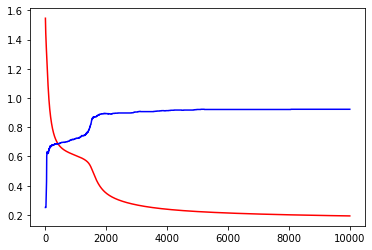

Loss before training 1.5456441640853882
Loss after training 0.19288592040538788


In [122]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2) #initialsing weights
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train) #calculate y_hat
  loss = loss_fn(y_hat, Y_train)#calculate loss
  loss.backward()#backprop
  loss_arr.append(loss.item())#loss append
  acc_arr.append(accuracy(y_hat, Y_train))#accuracy append

  with torch.no_grad():#with no grads
    weights1 -= weights1.grad * learning_rate#update weights
    bias1 -= bias1.grad * learning_rate#update bias
    weights2 -= weights2.grad * learning_rate#update weights
    bias2 -= bias2.grad * learning_rate#update bias
    #make all weights and bias as zero
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

## Using nn.functional


In [0]:
import torch.nn.functional as F

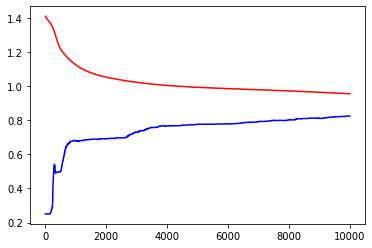

Loss before training 1.4111980199813843
Loss after training 0.9561843276023865


In [126]:
torch.manual_seed(0)
weights1 = torch.randn(2, 2) / math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4) / math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = F.cross_entropy(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

## Using nn.parameters

In [0]:
import torch.nn as nn

In [0]:
class FirstNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(0)
        self.weights1 = nn.Parameter(torch.randn(2, 2) / math.sqrt(2))
        self.bias1 = nn.Parameter(torch.zeros(2))
        self.weights2 = nn.Parameter(torch.randn(2, 4) / math.sqrt(2))
        self.bias2 = nn.Parameter(torch.zeros(4))
    
    def forward(self, X):
        a1 = torch.matmul(X, self.weights1) + self.bias1
        h1 = a1.sigmoid()
        a2 = torch.matmul(h1, self.weights2) + self.bias2
        h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
        return h2

In [0]:
def fit(epochs = 1000, learning_rate = 1):
    loss_arr = []
    acc_arr = []
    for epoch in range(epochs):
        y_hat = fn(X_train)
        loss = F.cross_entropy(y_hat, Y_train)
        loss_arr.append(loss.item())
        acc_arr.append(accuracy(y_hat, Y_train))

        loss.backward()
        with torch.no_grad():
            for param in fn.parameters():
                param -= learning_rate * param.grad
            fn.zero_grad()
            
    plt.plot(loss_arr, 'r-')
    plt.plot(acc_arr, 'b-')
    plt.show()      
    print('Loss before training', loss_arr[0])
    print('Loss after training', loss_arr[-1])

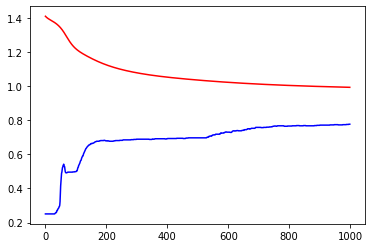

Loss before training 1.4111980199813843
Loss after training 0.9939236640930176


In [130]:
fn = FirstNetwork()
fit()

## Using nn.linear and Optim

In [0]:
class FirstNetwork_v1(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2, 2)
    self.lin2 = nn.Linear(2, 4)
    
  def forward(self, X):
    a1 = self.lin1(X)
    h1 = a1.sigmoid()
    a2 = self.lin2(h1)
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

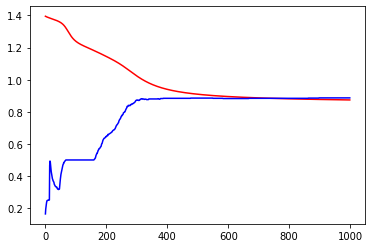

Loss before training 1.395160436630249
Loss after training 0.8738410472869873


In [132]:
fn = FirstNetwork_v1()
fit()

In [0]:
from torch import optim

In [0]:
def fit_v1(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []
  opt = optim.SGD(fn.parameters(), lr=learning_rate)
  
  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))

    loss.backward()
    opt.step()
    opt.zero_grad()
        
  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')
  plt.show()      
  print('Loss before training', loss_arr[0])
  print('Loss after training', loss_arr[-1])

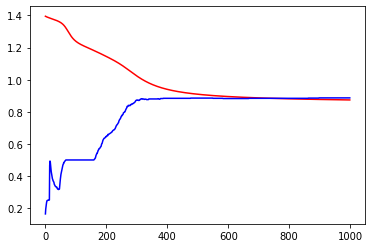

Loss before training 1.395160436630249
Loss after training 0.8738410472869873


In [135]:
fn = FirstNetwork_v1()
fit_v1()

## Using nn.sequential

In [0]:
class FirstNetwork_v2(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 2), 
        nn.Sigmoid(), 
        nn.Linear(2, 4), 
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

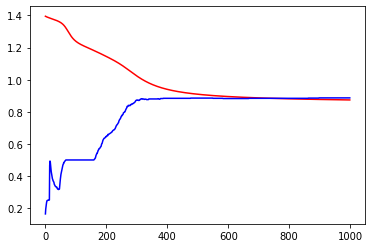

Loss before training 1.395160436630249
Loss after training 0.8738409876823425


In [137]:
fn = FirstNetwork_v2()
fit_v1()

## Cleaning the fit function 

In [0]:
def fit_v2(x, y, model, opt, loss_fn, epochs = 1000):
  
  for epoch in range(epochs):
    loss = loss_fn(model(x), y)

    loss.backward()
    opt.step()
    opt.zero_grad()
    
  return loss.item()

In [139]:
fn = FirstNetwork_v2()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr=1)
fit_v2(X_train, Y_train, fn, opt, loss_fn)

0.8738409876823425

## Running on GPU

In [140]:
device = torch.device("cuda")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v2()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3951594829559326
Time taken 1.0257747173309326


In [0]:
class FirstNetwork_v3(nn.Module):
  
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 1024*4), 
        nn.Sigmoid(), 
        nn.Linear(1024*4, 4), 
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

In [142]:
device = torch.device("cpu")

X_train=X_train.to(device)
Y_train=Y_train.to(device)
fn = FirstNetwork_v3()
fn.to(device)
tic = time.time()
print('Final loss', fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print('Time taken', toc - tic)

Final loss 1.3890225887298584
Time taken 21.194180488586426


## Exercises

1. Try out a deeper neural network, eg. 2 hidden layers
2. Try out different parameters in the optimizer (eg. try momentum, nestrov) -> check `optim.SGD` docs
3. Try out other optimization methods (eg. RMSProp and Adam) which are supported in `optim`
4. Try out different initialisation methods which are supported in `nn.init` 

